In [55]:
#!pip install statsmodels

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss #pruebas de estacionariedad
import warnings
from statsmodels.tsa.stattools import adfuller

In [2]:
norte = pd.read_csv("Datos_22_24_NORTE_limpios.csv", parse_dates=[0], index_col="date")
noreste = pd.read_csv("Datos_22_24_NORESTE_limpios.csv", parse_dates=[0], index_col="date")
noreste2 = pd.read_csv("Datos_22_24_NORESTE2_limpios.csv", parse_dates=[0], index_col="date")
sureste = pd.read_csv("Datos_22_24_SURESTE_limpios.csv", parse_dates=[0], index_col="date")
centro = pd.read_csv("Datos_22_24_CENTRO_limpios.csv", parse_dates=[0], index_col="date")

In [4]:
#Hace los datos diarios en lugar de por hora, utiliza la media
centro = centro.resample('D').mean() 
print("Dimensiones:", centro.shape)
centro.head().round(2)

Dimensiones: (943, 15)


,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR
date,,,,,,,,,,,,,,,
2022-01-01,1.53,5.15,18.90,24.26,25.42,68.58,29.17,705.87,0.0,24.79,4.33,0.15,26.11,5.73,185.29
2022-01-02,1.23,3.76,12.31,16.24,26.65,84.88,11.75,716.48,0.0,25.08,5.18,0.14,14.48,9.77,80.17
2022-01-03,1.20,5.14,12.60,17.99,31.67,41.92,7.23,720.07,0.0,24.96,3.55,0.15,9.79,9.21,77.50
2022-01-04,1.74,20.23,37.89,58.31,18.38,76.00,30.66,714.47,0.0,30.42,5.98,0.14,12.90,4.74,171.33
2022-01-05,1.66,15.48,36.30,51.99,25.10,88.12,27.82,710.17,0.0,24.27,7.10,0.15,19.87,6.28,167.63


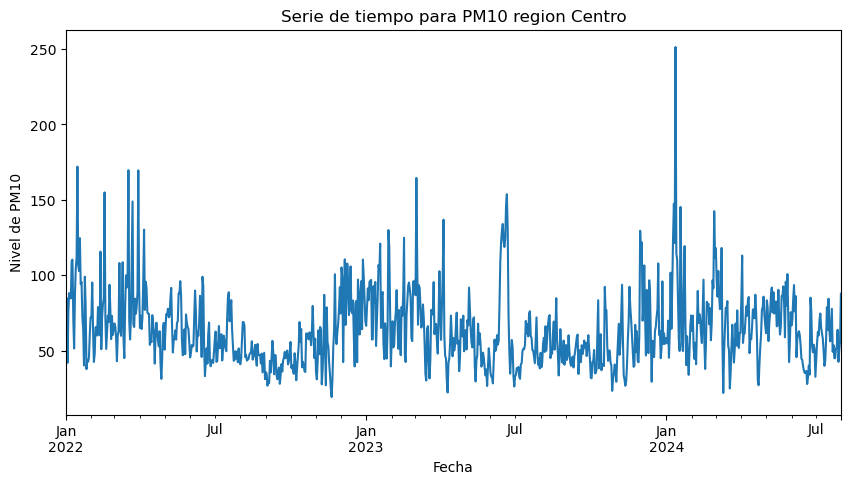

In [5]:
plt.rcParams.update({'figure.figsize': (10,5)})
centro["PM10"].plot()
plt.title("Serie de tiempo para PM10 region Centro")
plt.xlabel("Fecha");
plt.ylabel("Nivel de PM10");

## Estacionarización

Se utilizaran las pruebas Augmented Dickey-Fuller (ADF) y Kwiatkowski-Phillips-Schmidt-Shin (KPSS) para evaluar la estacionariedad de las series de tiempo.

**Prueba Augmented Dickey-Fuller (ADF)**
- $H_0$: La serie tiene una raíz unitaria, es decir, **NO** es estacionaria.
- $H_1$: La serie **no** tiene una raíz unitaria, es decir, **SI** es estacionaria.

**Kwiatkowski-Phillips-Schmidt-Shin (KPSS)**
- $H_0$: La serie **SI** es estacionaria (con respecto a una constante o tendencia).
- $H_1$: La serie es **NO** estacionaria (no se mantiene estacionaria en torno a una constante o tendencia).

Se utilizara un nivel de significancia $(\alpha)$ de $0.05$

Para la funcion `kpss()`:

El parametro *regression* es la hipotesis nula del test: {"c", "ct"}
- "c": Hay estacionariedad a **nivel** (Stationary around a constant)
- "ct": Hay estacionariedad de **tendencia** (Stationary around a trend)

Y para la funcion `adfuller()`:

El parametro *regression*: {“c”, ”ct”, ”ctt”, ”n”}
- “c” : constant **only**.
- “ct” : constant **and** trend.

In [11]:
# Función para prueba ADF
def prueba_adf(serie):
    print("-- ADF a nivel --")
    resultado = adfuller(serie, regression = "c")
    print(f'Estadístico ADF: {resultado[0]}')
    print(f'Valor p: {resultado[1]}')
    print('Valores Críticos:')
    if resultado[1] <= 0.05:
        print("La serie SI es estacionaria a nivel (rechazamos la hipótesis nula).")
    else:
        print("La serie NO es estacionaria a nivel (no rechazamos la hipótesis nula).")
        
    print("\n-- ADF de tendencia --")
    resultado = adfuller(serie, regression = "ct")
    print(f'Estadístico ADF: {resultado[0]}')
    print(f'Valor p: {resultado[1]}')
    print('Valores Críticos:')
    if resultado[1] <= 0.05:
        print("La serie SI es estacionaria a nivel y tendencia (rechazamos la hipótesis nula).")
    else:
        print("La serie NO es estacionaria a nivel y tendencia (no rechazamos la hipótesis nula).")

# Función para prueba KPSS
def prueba_kpss(serie):
    print("-- KPSS a nivel --")
    resultado = kpss(serie, regression = "c")
    print(f'Estadístico KPSS: {resultado[0]}')
    print(f'Valor p: {resultado[1]}')
    print('Valores Críticos:')
    if resultado[1] <= 0.05:
        print("La serie NO es estacionaria a nivel (rechazamos la hipótesis nula).")
    else:
        print("La serie SI es estacionaria a nivel (no rechazamos la hipótesis nula).")
    
    print("\n-- KPSS de tendencia --")
    resultado = kpss(serie, regression = "ct")
    print(f'Estadístico KPSS: {resultado[0]}')
    print(f'Valor p: {resultado[1]}')
    print('Valores Críticos:')
    if resultado[1] <= 0.05:
        print("La serie NO es estacionaria a tendencia (rechazamos la hipótesis nula).")
    else:
        print("La serie SI es estacionaria a tendencia (no rechazamos la hipótesis nula).")

In [7]:
# Prueba KPSS para PM10 region centro
prueba_adf(centro["PM10"])

-- ADF a nivel --
Estadístico ADF: -7.239542273265946
Valor p: 1.900198380711834e-10
Valores Críticos:
La serie SI es estacionaria a nivel (rechazamos la hipótesis nula).

-- ADF de tendencia --
Estadístico ADF: -7.240204381014418
Valor p: 4.0174323672875075e-09
Valores Críticos:
La serie SI es estacionaria a nivel y tendencia (rechazamos la hipótesis nula).


In [12]:
# Prueba KPSS para PM10 region centro
prueba_kpss(centro["PM10"])

-- KPSS a nivel --
Estadístico KPSS: 0.183512522805079
Valor p: 0.1
Valores Críticos:
La serie SI es estacionaria a nivel (no rechazamos la hipótesis nula).

-- KPSS de tendencia --
Estadístico KPSS: 0.17559759198015376
Valor p: 0.025335340016538525
Valores Críticos:
La serie NO es estacionaria a tendencia (rechazamos la hipótesis nula).


/var/folders/lv/34x2z89s3s3bys5fzpv8k45c0000gn/T/ipykernel_40140/981804481.py:26: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  resultado = kpss(serie, regression = "c")


**Interpretación:** Segun los resultados de la prueba KPSS los datos de PM10 para la region centro SI cumplen con la estacionariedad a nivel (Level Stationarity) pero no con la estacionariedad de tendencia (Trend Stationarity). Esto implica lo siguiente:

**Estacionariedad a Nivel (Level Stationarity):**
- Los datos no presentan una varianza cambiante a lo largo del tiempo.
- La media de la serie es constante en el tiempo.
- En términos prácticos, el comportamiento de los datos fluctúa alrededor de un nivel constante (aunque pueden haber fluctuaciones estacionales o ruido).

**No estacionariedad de Tendencia (No Trend Stationarity):**
- La serie tiene una tendencia subyacente (creciente o decreciente) que no se puede eliminar directamente restando una constante o tomando promedios móviles.
- Esto sugiere que hay una dirección a largo plazo (como un incremento o decremento general en los niveles de PM10 con el tiempo).
- Es probable que se requiera realizar una diferenciación para eliminar la tendencia y convertir la serie en completamente estacionaria.

### Differencing & Seasonal differencing

$$
y(t) = y(t) - y(t - 1)
$$

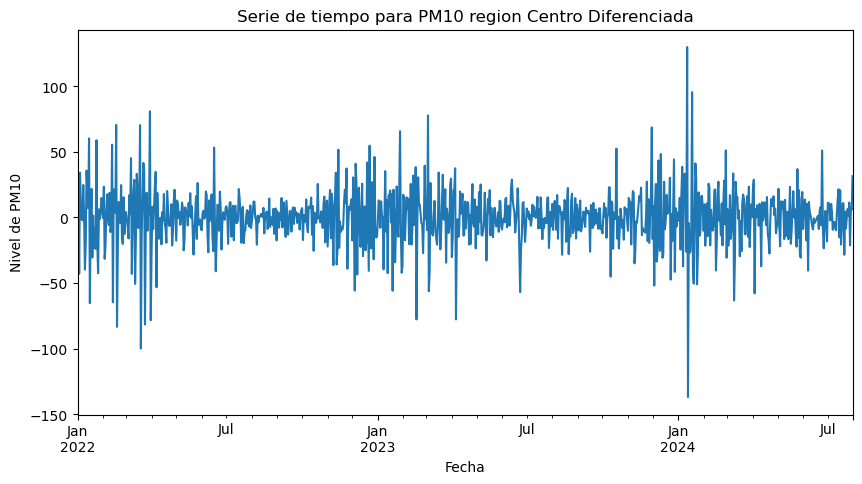

In [61]:
ctro = centro.copy()
ctro["PM10"] = ctro["PM10"] - ctro["PM10"].shift(1)
ctro["PM10"].plot()
plt.title("Serie de tiempo para PM10 region Centro Diferenciada")
plt.xlabel("Fecha");
plt.ylabel("Nivel de PM10");

In [113]:
ctro.dropna(inplace=True)
prueba_kpss(ctro["PM10"])

-- KPSS a nivel --
Estadístico KPSS: 0.0436486622126704
Valor p: 0.1
Valores Críticos:
La serie SI es estacionaria a nivel (no rechazamos la hipótesis nula).

-- KPSS de tendencia --
Estadístico KPSS: 0.03301393447237455
Valor p: 0.1
Valores Críticos:
La serie SI es estacionaria a tendencia (no rechazamos la hipótesis nula).


/var/folders/lv/34x2z89s3s3bys5fzpv8k45c0000gn/T/ipykernel_39140/981804481.py:26: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/var/folders/lv/34x2z89s3s3bys5fzpv8k45c0000gn/T/ipykernel_39140/981804481.py:36: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


